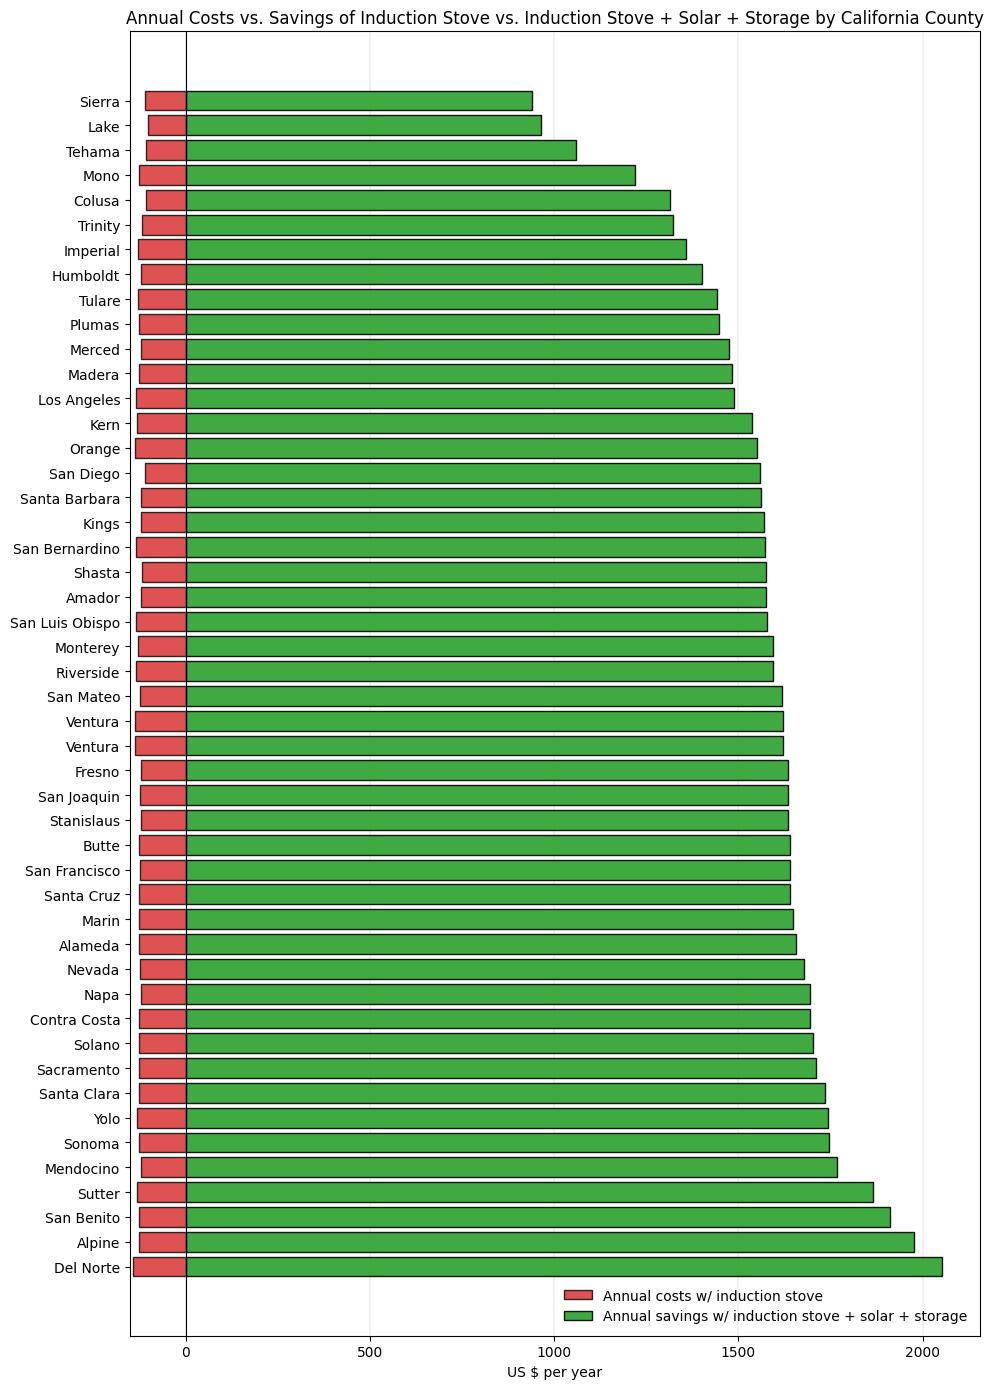

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# ────────────────────────────────────────────────────────────────────
# 1.  Load the GeoJSON
# ────────────────────────────────────────────────────────────────────
induction_gdf = gpd.read_file(
    "../data/loadprofiles/induction_stove/single-family-detached/RESULTS/geojson/induction_stove.geojson"
)

# ────────────────────────────────────────────────────────────────────
# 2.  Tell the code which columns to plot
#     • savings_col → positive numbers, goes to the RIGHT of 0
#     • cost_col    → we’ll flip the sign so it goes to the LEFT of 0
# ────────────────────────────────────────────────────────────────────
savings_col = "Annual Savings (Electrification + Solar + Storage)"
cost_col    = "Annual Savings (Electrification Only)"   # a cost column, not another savings column!

induction_gdf = induction_gdf.dropna(subset=[cost_col, savings_col])

# make sure every cost bar is negative so it starts at 0 and points left
induction_gdf["Cost (left)"] = -induction_gdf[cost_col].abs()    # abs() guarantees we’re working with magnitudes only

# Sort counties for a tidy chart (largest savings on top)
induction_gdf_sorted = induction_gdf.sort_values(savings_col, ascending=False).reset_index(drop=True)

# ────────────────────────────────────────────────────────────────────
# 3.  Build the diverging horizontal bar chart
# ────────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(10, 14))

y_pos = np.arange(len(induction_gdf_sorted))

# (a) draw the cost bars FIRST (so they sit behind the green ones)
ax.barh(
    y_pos,
    induction_gdf_sorted["Cost (left)"],
    color="tab:red",
    edgecolor="black",
    alpha=0.8,
    label="Annual costs w/ induction stove",
    zorder=1,                # draw under the savings bars
)

# (b) draw the savings bars SECOND
ax.barh(
    y_pos,
    induction_gdf_sorted[savings_col],
    color="tab:green",
    edgecolor="black",
    alpha=0.9,
    label="Annual savings w/ induction stove + solar + storage",
    zorder=2,
)

ax.set_yticks(y_pos)
ax.set_yticklabels(induction_gdf_sorted["NAME"])
ax.set_xlabel("US $ per year")
ax.set_title("Annual Costs vs. Savings of Induction Stove vs. Induction Stove + Solar + Storage by California County")

# Draw a vertical zero-line so it’s crystal-clear where the split is
ax.axvline(0, color="black", linewidth=0.8)

# Pad the x-axis limits a bit so the labels don’t hug the frame
x_max = induction_gdf_sorted[savings_col].max() * 1.05
x_min = induction_gdf_sorted["Cost (left)"].min()  * 1.05  # this is already negative
ax.set_xlim(x_min, x_max)

ax.legend(frameon=False, loc="lower right")
ax.grid(axis="x", linewidth=0.25)

plt.tight_layout()
plt.show()

In [2]:
# ────────────────────────────────────────────────────────────────────
# 5.  Median annual delta (cost – savings) across all counties
# ────────────────────────────────────────────────────────────────────
# Step-1: turn the (possibly negative) “cost” numbers into a positive magnitude
annual_cost_induction = induction_gdf[cost_col].abs()

# Step-2: delta per county
induction_gdf["Annual Δ (cost – savings)"] = annual_cost_induction + induction_gdf[savings_col]

# Step-3: median of those deltas
median_d = induction_gdf["Annual Δ (cost – savings)"].median()

print(f"Median annual delta (cost − savings) for adopting an induction stove with solar + storage: "
      f"${median_d:,.0f} per year")

Median annual delta (cost − savings) for adopting an induction stove with solar + storage: $1,735 per year


In [3]:
avg_cost    = induction_gdf[cost_col].abs().mean()
avg_savings = induction_gdf[savings_col].mean()

print(f"Average annual cost (induction only):            ${avg_cost:,.0f}")
print(f"Average annual savings (induction + solar + storage): ${avg_savings:,.0f}")

Average annual cost (induction only):            $125
Average annual savings (induction + solar + storage): $1,571
